## 1 Linear Regression

### Simple Linear Regression

   Area   Prices 
0     10       20
1     20       30
2     30       50
3     40       70
4     50      100
Columns in Datast:  Index(['Area ', 'Prices '], dtype='object')


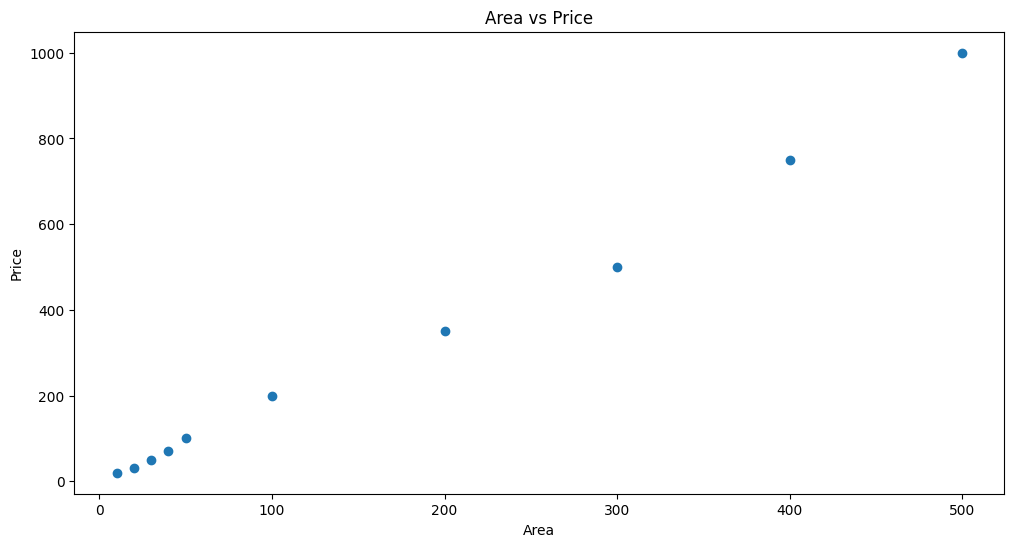


Regression Intercept (bias): -9.631067961165058
Regression Coefficient (weight): 1.9189761694616063
Predicted price:  182.26654898499558


In [ ]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#loading dataset
house_df = pd.read_csv("/content/drive/MyDrive/House_Price - Sheet1.csv")
print(house_df.head())

print("Columns in Datast: ", house_df.columns)

# Area vs Price Plot

plt.figure(figsize = (12, 6))
plt.scatter(house_df['Area '], house_df['Prices '])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

# Df splitting

X = house_df['Area ']
y = house_df['Prices ']

# Model Building

n = len(X)
x_mean = np.mean(X)
y_mean = np.mean(y)

# Determining parameters
m = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean)**2) #least square method
c = y_mean - m * x_mean

# Model Parameters
print(f"""
Regression Intercept (bias): {c}
Regression Coefficient (weight): {m}""")

# Testing

price = 100*m + c
print("Predicted price: ", price)

### Multivariate Linear Regression

In [ ]:
# Multivarite Linear Regression using the normal equation.
x=np.array([[1,100,3],[1,300,7],[1,500,4]]) # features
y=np.array([300,700,600]) # target

# estimating parameters
xt=x.T
xtx=xt@x
xinv=np.linalg.inv(xtx)
xty=xt@y
b=xinv@xty # using the normal equation

print(f"""
Intercept: {b[0]}
Coefficient of 1st feature: {b[1]}
Coefficient of 2nd feature: {b[2]}""")

x_new = [1, 450, 8]
y_pred = x_new@b
print("Predicted value ", y_pred)



Intercept: 28.571428571429387
Coefficient of 1st feature: 0.5714285714285712
Coefficient of 2nd feature: 71.42857142857144
Predicted value  857.142857142858


###Gradient Descent

Multivariate Linear Regression

Epoch 0: Loss = 13.900, w = [0.468 0.377 0.131]
Epoch 100: Loss = 0.113, w = [0.61649794 0.38503748 0.15511243]
Epoch 200: Loss = 0.083, w = [0.73771752 0.38172605 0.14517816]
Epoch 300: Loss = 0.063, w = [0.83890418 0.37896188 0.13688565]
Epoch 400: Loss = 0.048, w = [0.92336859 0.37665452 0.12996357]
Epoch 500: Loss = 0.038, w = [0.9938743  0.37472848 0.12418544]
Epoch 600: Loss = 0.031, w = [1.05272813 0.37312074 0.11936221]
Epoch 700: Loss = 0.026, w = [1.1018557  0.37177869 0.11533608]
Epoch 800: Loss = 0.023, w = [1.14286437 0.37065844 0.11197531]
Epoch 900: Loss = 0.020, w = [1.1770959  0.36972332 0.10916995]
Final weights: w = [1.20540932 0.36894986 0.10684959]


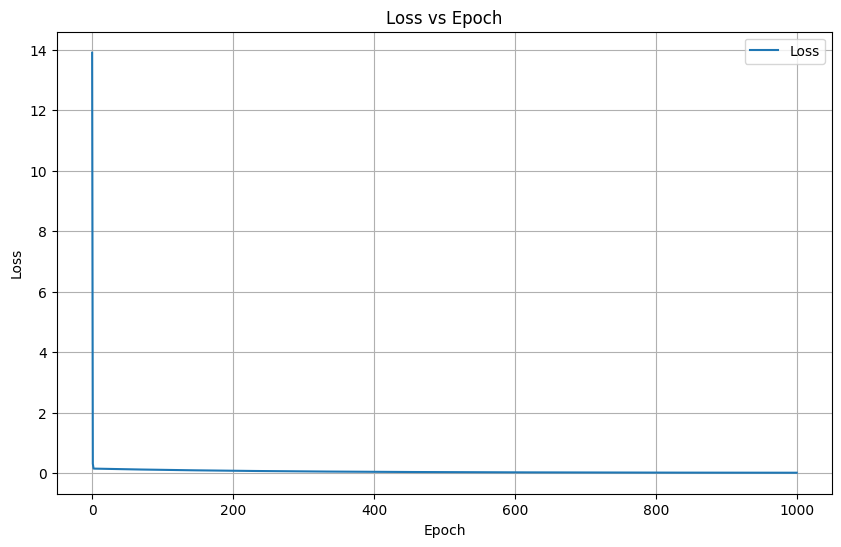

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data (let's assume we have 2 features, x1 and x2)
X = np.array([[1, 1, 3],
              [1, 2, 6],
              [1, 3, 9],
              [1, 4, 12],
              [1, 5, 15]])  # First column is bias term (all 1s), next columns are features
y = np.array([2, 2.5, 3.5, 4.0, 4.5])

# Hyperparameters
w = np.array([0.5, 0.5, 0.5])  # Initial weights for bias, w1, w2 (for two features)
learning_rate = 0.01
epochs = 1000

m = len(X)
loss_history = []

# Gradient Descent
for epoch in range(epochs):
    # Predicted values using the model
    y_pred = X @ w  # X is (m x n) and w is (n x 1), result is (m x 1)

    # Compute the gradients
    dw = -(1/m) * X.T @ (y - y_pred)

    # Update weights
    w -= learning_rate * dw
    loss = np.mean((y - y_pred) ** 2)  # Mean Squared Error
    loss_history.append(loss)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss:.3f}, w = {w}')

# Final weights after training
print(f'Final weights: w = {w}')

# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid()
plt.show()


Univariate Linear Regression

Epoch 0: Loss = 1.750, w0 = 0.509, w1 = 0.529
Epoch 10: Loss = 0.405, w0 = 0.571, w1 = 0.717
Epoch 20: Loss = 0.164, w0 = 0.601, w1 = 0.795
Epoch 30: Loss = 0.120, w0 = 0.619, w1 = 0.826
Epoch 40: Loss = 0.110, w0 = 0.632, w1 = 0.838
Epoch 50: Loss = 0.106, w0 = 0.642, w1 = 0.841
Epoch 60: Loss = 0.104, w0 = 0.651, w1 = 0.842
Epoch 70: Loss = 0.102, w0 = 0.659, w1 = 0.840
Epoch 80: Loss = 0.100, w0 = 0.668, w1 = 0.839
Epoch 90: Loss = 0.098, w0 = 0.676, w1 = 0.837
Final weights: w0 = 0.683, w1 = 0.835


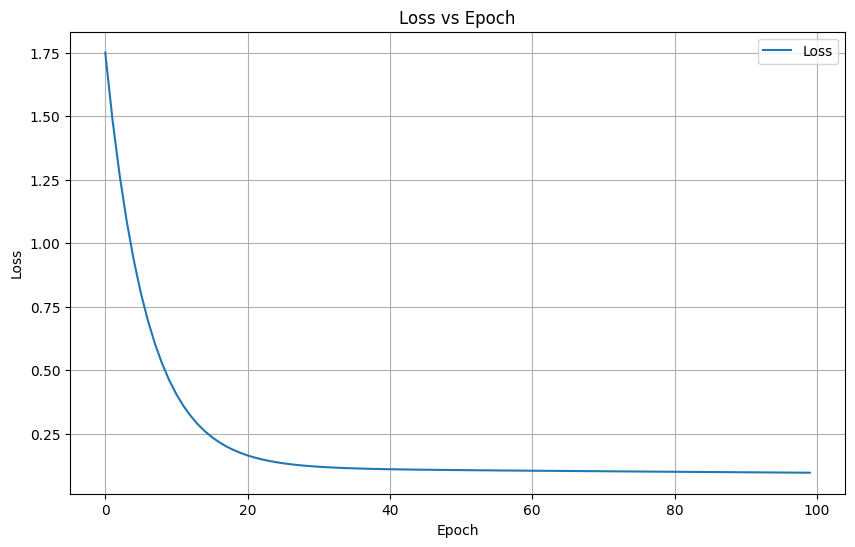

In [ ]:
# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 2.5, 3.5, 4.0, 4.5])

# Hyperparameters
w0 = 0.5
w1 = 0.5
learning_rate = 0.007
epochs = 100

m = len(x)
loss_history = []

# Gradient Descent
for epoch in range(epochs):
    # Predicted values using polynomial model
    y_pred = w0 + w1*x

    # Compute the gradients
    dw0 = -(1/m) * np.sum(y - y_pred)
    dw1 = -(1/m) * np.sum((y - y_pred) * x)

    # Update weights
    w0 -= learning_rate * dw0
    w1 -= learning_rate * dw1
    loss = np.mean((y - y_pred) ** 2)  # Mean Squared Error
    loss_history.append(loss)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Loss = {loss:.3f}, w0 = {w0:.3f}, w1 = {w1:.3f}')

# Final weights after training
print(f'Final weights: w0 = {w0:.3f}, w1 = {w1:.3f}')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid()
plt.show()


## 2 Logistic Regression

Logistic Regression with Gradient Descent

Epoch 0: Loss = 0.6904
Epoch 1000: Loss = 0.5246
Epoch 2000: Loss = 0.4978
Epoch 3000: Loss = 0.4868
Epoch 4000: Loss = 0.4813
Epoch 5000: Loss = 0.4783
Epoch 6000: Loss = 0.4766
Epoch 7000: Loss = 0.4755
Epoch 8000: Loss = 0.4749
Epoch 9000: Loss = 0.4744
Epoch 10000: Loss = 0.4741
Accuracy: 71.9101


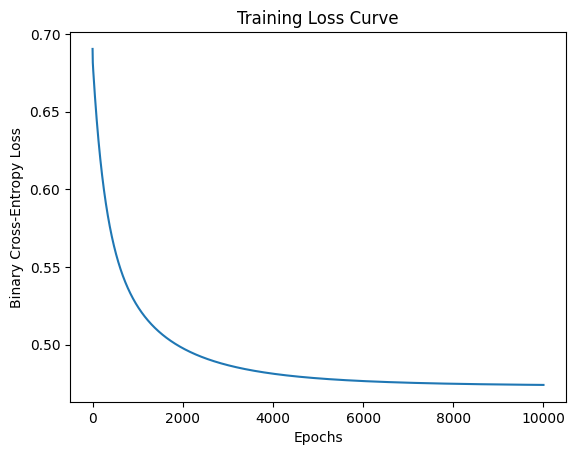

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
threshold = y.mean()
y=(y>threshold).astype(int) #converting y into binary output taking mean as thrshold.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



m, n = X_train.shape
w = np.random.randn(n)*0.2 # or w=np.zero() + 0.2
b=0
alpha=0.9
epochs=10001

def sigmoid(z):
  return 1/(1+np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
  ep = 1e-7 # to avoid log(0) error
  return -np.mean(y_true*np.log(y_pred+ep) + (1-y_true)*np.log(1-y_pred+ep))

losses = []

for epoch in range(epochs):
  z = X_train@w + b
  predictions = sigmoid(z)
  error = predictions - y_train

  # GRADIENT
  dw = (1/m) * X_train.T@error
  db = (1/m) * np.sum(error)

  # update parameters

  w -= alpha * dw
  b -= alpha * db

  # calculate loss
  loss = binary_cross_entropy(y_train, predictions)
  losses.append(loss)

  # print loss every 100 epochs
  if epoch % 1000 == 0:
    print(f"Epoch {epoch}: Loss = {loss:.4f}")

# predict the test set
z_test = np.dot(X_test, w) + b
y_pred_test = sigmoid(z_test)
y_pred_class=(y_pred_test>0.5).astype(int)

# Accuracy
accuracy = np.mean(y_pred_class == y_test)
print(f"Accuracy: {accuracy*100:.4f}")

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training Loss Curve')
plt.show()


## 3 KNN Classifier

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Dataset preparation
iris_df = datasets.load_iris()
x = iris_df.data
y = iris_df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Finding feature mean and Std
feature_means = np.mean(x_train, axis=0)
feature_stds = np.std(x_train, axis=0)

# Z-score normalisation
X_train_normalized = (x_train - feature_means) / feature_stds
X_test_normalized = (x_test - feature_means) / feature_stds

# Imlement knn for 3 features
def knn_predict(X_train, Y_train, X_test, k=3):
    predictions = []

    for test_sample in x_test:
      # Euclidean dstace
      distances = np.sqrt(np.sum((x_train - test_sample)**2, axis=1))

      # Get indices of K nearest neighbours
      nearest_indices = np.argsort(distances)[:k]

      # Get lbels of nearest neigbhours
      nearest_labels = y_train[nearest_indices]

      # Predict  most common label
      unique, counts = np.unique(nearest_labels, return_counts=True)
      predicted_label = unique[np.argmax(counts)]

      predictions.append(predicted_label)

    return np.array(predictions)

knn_predict(x_train, y_train, x_test)




array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 4 K Means Clustering

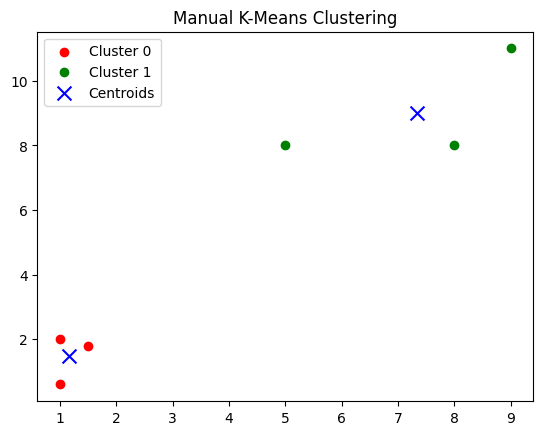

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (2D for easy visualization)
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11]
])

# Number of clusters
k = 2

# Randomly choose k data points as initial centroids
np.random.seed(42)
initial_indices = np.random.choice(len(X), k, replace=False)
centroids = X[initial_indices]

# Function to calculate Euclidean distance
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-means algorithm
max_iters = 100
for _ in range(max_iters):
    # Step 1: Assign clusters
    clusters = [[] for _ in range(k)]
    for point in X:
        dists = [distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(dists)
        clusters[cluster_idx].append(point)

    # Step 2: Update centroids
    new_centroids = []
    for cluster in clusters:
        if cluster:
            new_centroids.append(np.mean(cluster, axis=0))
        else:
            new_centroids.append(np.random.rand(2))  # handle empty cluster
    new_centroids = np.array(new_centroids)

    # Stop if centroids don't change
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Final cluster assignments
final_labels = []
for point in X:
    dists = [distance(point, centroid) for centroid in centroids]
    final_labels.append(np.argmin(dists))

# Plot result
X = np.array(X)
final_labels = np.array(final_labels)
colors = ['r', 'g']
for i in range(k):
    plt.scatter(X[final_labels == i, 0], X[final_labels == i, 1], c=colors[i], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', marker='x', s=100, label='Centroids')
plt.title("Manual K-Means Clustering")
plt.legend()
plt.show()
